# 🚴 Bike Sharing Demand Prediction

## 📌 Introduction  
This notebook explores the **Bike Sharing Dataset** collected from the Capital Bikeshare system in Washington D.C. during 2011–2012.  
Bike-sharing systems generate rich data on rental usage, influenced by factors such as weather, seasonality, weekdays, and holidays.  
Understanding these patterns is crucial for improving operations, planning infrastructure, and forecasting demand.  

The **goal of this project** is to analyze the dataset, engineer meaningful features, and build predictive models to estimate daily bike rental counts (`cnt`).  

---

## 📊 Dataset Description  
The dataset contains daily and hourly aggregated records of bike rentals, with the following key variables:

- **Temporal features:** season, year, month, weekday, workingday, holiday  
- **Weather features:** weather situation, temperature, humidity, windspeed  
- **Target variable:**  
  - `cnt` → total number of bikes rented (casual + registered users)  

---

## 🎯 Objectives  
1. **Data Cleaning & Preprocessing**  
   - Handle categorical and numerical features  
   - Extract additional date-related variables  

2. **Exploratory Data Analysis (EDA)**  
   - Identify seasonal patterns and trends  
   - Explore effects of weekdays, holidays, and weather conditions  

3. **Modeling**  
   - Train multiple machine learning models using a consistent preprocessing pipeline  
   - Compare performance of:  
     - Linear Regression  
     - Decision Tree Regressor  
     - Random Forest Regressor  
     - XGBoost Regressor  

4. **Evaluation & Insights**  
   - Assess model performance using R², RMSE, and MAE  
   - Analyze feature importance to understand what drives bike rental demand  

---

👉 This workflow takes us from raw data through EDA, feature engineering, and model evaluation, ending with actionable insights about factors that influence bike-sharing demand.

### Tasks

- Try to extract the weekday and workingday variables from the dteday variable.

- Try to run the exploratory analysis with feature engineering. Try different models, report the results and communicate the insights.

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
# Load the DataSet
day_data = pd.read_csv('day.csv')

In [3]:
#Preview the first 10 Rows
day_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
# checking the datatypes and information about the dataset
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Feature Engineering

In [6]:
# converting the 'dteday' column to datetime format

day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [7]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
day_data['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [9]:
list(day_data['weekday'].unique())

[np.int64(6),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5)]

In [11]:
# weekdays should start from sunday 
weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weekday_fe = []
for day in day_data['weekday']:
    dayoftheweek = weekdays[day]
    weekday_fe.append(dayoftheweek)
# add weekday_fe to the dataset
day_data['day_of_week'] = weekday_fe


In [12]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Thursday
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Friday
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Saturday
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Sunday


In [13]:
# generate year column from the dteday 
months_of_the_year = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for month in day_data['dteday'].dt.month:
    print(months_of_the_year[month-1])
    # append the month name series to the dat_data dataset
day_data['month'] = day_data['dteday'].dt.month.apply(lambda x: months_of_the_year[x-1])

January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
January
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
February
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
March
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
April
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
May
June
June


In [14]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,month
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,January
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,January
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,January
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,January
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Thursday,December
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Friday,December
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Saturday,December
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Sunday,December


In [15]:
day_data['year'] = day_data['dteday'].dt.year.apply(lambda x : '2011' if x == 2011 else 2012)

In [16]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,month,year
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,January,2011
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,January,2011
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,January,2011
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,January,2011
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,January,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Thursday,December,2012
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Friday,December,2012
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Saturday,December,2012
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Sunday,December,2012


In [17]:
# day_data['weekend'] = 1 if its weekend amd 0 otherwise
day_data['weekend'] =  day_data['day_of_week'].apply(lambda x: 1 if (x == 'Saturday' or x == 'Sunday') else 0)

In [18]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,month,year,weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,January,2011,1
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,January,2011,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,January,2011,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,January,2011,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,January,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,Thursday,December,2012,0
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,Friday,December,2012,0
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,Saturday,December,2012,1
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,Sunday,December,2012,1


In [19]:
day_data['working_day'] = ((~ day_data['weekday'].isin([5,6])) & (day_data['holiday'] == 0)).astype(int)

In [20]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,day_of_week,month,year,weekend,working_day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,Saturday,January,2011,1,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,Sunday,January,2011,1,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,Monday,January,2011,0,1
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,Tuesday,January,2011,0,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,Wednesday,January,2011,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,0.652917,0.350133,247,1867,2114,Thursday,December,2012,0,1
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,0.590000,0.155471,644,2451,3095,Friday,December,2012,0,0
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,0.752917,0.124383,159,1182,1341,Saturday,December,2012,1,0
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,0.483333,0.350754,364,1432,1796,Sunday,December,2012,1,1


In [21]:
day_data[(day_data['workingday'] == 0) & (day_data['holiday'] ==1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,day_of_week,month,year,weekend,working_day
16,17,2011-01-17,1,0,1,1,1,0,2,0.175833,...,0.537500,0.194017,117,883,1000,Monday,January,2011,0,0
51,52,2011-02-21,1,0,2,1,1,0,2,0.303333,...,0.605000,0.307846,195,912,1107,Monday,February,2011,0,0
104,105,2011-04-15,2,0,4,1,5,0,1,0.446667,...,0.671250,0.226375,642,2484,3126,Friday,April,2011,0,0
149,150,2011-05-30,2,0,5,1,1,0,1,0.733333,...,0.685000,0.131225,1549,2549,4098,Monday,May,2011,0,0
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,...,0.637917,0.081479,3065,2978,6043,Monday,July,2011,0,0
247,248,2011-09-05,3,0,9,1,1,0,2,0.673333,...,0.790417,0.212696,1236,2115,3351,Monday,September,2011,0,0
282,283,2011-10-10,4,0,10,1,1,0,1,0.570833,...,0.733750,0.042304,1514,3603,5117,Monday,October,2011,0,0
314,315,2011-11-11,4,0,11,1,5,0,1,0.324167,...,0.446250,0.314675,440,2928,3368,Friday,November,2011,0,0
327,328,2011-11-24,4,0,11,1,4,0,1,0.373333,...,0.549167,0.167304,560,935,1495,Thursday,November,2011,0,0
359,360,2011-12-26,1,0,12,1,1,0,1,0.321739,...,0.506957,0.239465,430,887,1317,Monday,December,2011,0,0



## EDA 
(EXPLORATORY DATA ANALYSIS)

In [22]:
# lets take a look at our data
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,day_of_week,month,year,weekend,working_day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,Saturday,January,2011,1,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,Sunday,January,2011,1,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,Monday,January,2011,0,1
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,Tuesday,January,2011,0,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,Wednesday,January,2011,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,0.652917,0.350133,247,1867,2114,Thursday,December,2012,0,1
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,0.590000,0.155471,644,2451,3095,Friday,December,2012,0,0
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,0.752917,0.124383,159,1182,1341,Saturday,December,2012,1,0
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,0.483333,0.350754,364,1432,1796,Sunday,December,2012,1,1


In [23]:
# Count of total rental bikes
day_data['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [24]:
day_data['season'].unique()

array([1, 2, 3, 4])

In [25]:
# season 1 (SPRING)
day_data['cnt'][day_data['season'] == 1].describe()

count     181.000000
mean     2604.132597
std      1399.942119
min       431.000000
25%      1538.000000
50%      2209.000000
75%      3456.000000
max      7836.000000
Name: cnt, dtype: float64

In [26]:
day_data['cnt'][day_data['season'] == 2].describe() # season 2 (SUMMER)

count     184.000000
mean     4992.331522
std      1695.977235
min       795.000000
25%      4003.000000
50%      4941.500000
75%      6377.000000
max      8362.000000
Name: cnt, dtype: float64

In [27]:
day_data['cnt'][day_data['season'] == 3].describe() # season 3 (FALL)

count     188.000000
mean     5644.303191
std      1459.800381
min      1115.000000
25%      4586.500000
50%      5353.500000
75%      6929.250000
max      8714.000000
Name: cnt, dtype: float64

In [28]:
day_data['cnt'][day_data['season'] == 4].describe() # season 4 (WINTER)

count     178.000000
mean     4728.162921
std      1699.615261
min        22.000000
25%      3615.500000
50%      4634.500000
75%      5624.500000
max      8555.000000
Name: cnt, dtype: float64

the distribution of daily bike rentals (cnt) across the four seasons:


•	Spring (Season 1): Rentals were the lowest, with an average of ~2,600 bikes per day.

•	Summer (Season 2): Rentals increased sharply, averaging ~4,900 per day.

•	Fall (Season 3): This season had the highest demand, averaging ~5,600 per day.

•	Winter (Season 4): Rentals dropped slightly to ~4,700 per day.

The spread of values (standard deviation) was also larger in summer and fall, indicating greater variability in usage during peak seasons. Winter had a very low minimum (22 rentals), suggesting days with severe weather or special events where bike usage nearly stopped.

separate the year-to-year growth trend (2011 vs 2012). It’s possible that higher demand in fall is partly due to overall growth in 2012 rather than pure seasonality. I will repeat this analysis grouped by both yr and season to check whether the seasonal pattern holds consistently across years.

In [29]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,day_of_week,month,year,weekend,working_day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,Saturday,January,2011,1,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,Sunday,January,2011,1,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,Monday,January,2011,0,1
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,Tuesday,January,2011,0,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,Wednesday,January,2011,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,0.652917,0.350133,247,1867,2114,Thursday,December,2012,0,1
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,0.590000,0.155471,644,2451,3095,Friday,December,2012,0,0
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,0.752917,0.124383,159,1182,1341,Saturday,December,2012,1,0
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,0.483333,0.350754,364,1432,1796,Sunday,December,2012,1,1


In [30]:
day_data['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: year
Non-Null Count  Dtype 
--------------  ----- 
731 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [31]:
day_data_2011 = day_data[day_data['year'] == '2011']

In [32]:
day_data_2011['cnt'][day_data_2011['season'] == 1].describe()

count      90.000000
mean     1666.666667
std       614.012663
min       431.000000
25%      1251.750000
50%      1602.500000
75%      2030.750000
max      3239.000000
Name: cnt, dtype: float64

In [33]:
day_data_2011['cnt'][day_data_2011['season'] == 2].describe()

count      92.000000
mean     3775.173913
std      1138.901028
min       795.000000
25%      3060.000000
50%      4085.500000
75%      4664.250000
max      5805.000000
Name: cnt, dtype: float64

In [34]:
day_data_2011['cnt'][day_data_2011['season'] == 3].describe()

count      94.000000
mean     4464.361702
std       798.348077
min      1115.000000
25%      4179.250000
50%      4615.500000
75%      4877.250000
max      6043.000000
Name: cnt, dtype: float64

In [35]:
day_data_2011['cnt'][day_data_2011['season'] == 4].describe()

count      89.000000
mean     3664.460674
std       983.006128
min       627.000000
25%      3068.000000
50%      3717.000000
75%      4205.000000
max      5511.000000
Name: cnt, dtype: float64

In [36]:
day_data['year'].unique()

array(['2011', 2012], dtype=object)

In [37]:
day_data['year'] = day_data['year'].astype('object')

In [38]:
day_data_2012 = day_data[day_data['year'] == 2012]

In [39]:
day_data_2012['cnt'][day_data_2012['season'] == 1].describe()

count      91.000000
mean     3531.296703
std      1341.203270
min       441.000000
25%      2591.000000
50%      3456.000000
75%      4320.000000
max      7836.000000
Name: cnt, dtype: float64

In [40]:
day_data_2012['cnt'][day_data_2012['season'] == 2].describe()

count      92.000000
mean     6209.489130
std      1221.345569
min      1027.000000
25%      5621.000000
50%      6384.000000
75%      6998.750000
max      8362.000000
Name: cnt, dtype: float64

In [41]:
day_data_2012['cnt'][day_data_2012['season'] == 3].describe()

count      94.000000
mean     6824.244681
std       912.756191
min      4073.000000
25%      6230.500000
50%      6941.500000
75%      7455.000000
max      8714.000000
Name: cnt, dtype: float64

In [42]:
day_data_2012['cnt'][day_data_2012['season'] == 4].describe()

count      89.000000
mean     5791.865169
std      1598.520901
min        22.000000
25%      5138.000000
50%      5629.000000
75%      7282.000000
max      8555.000000
Name: cnt, dtype: float64

When separating the analysis by year and season, two clear patterns emerge:

•	Trend effect: Rentals increased substantially from 2011 to 2012 across all seasons. For example, the average daily rentals in spring rose from ~1,667 in 2011 to ~3,531 in 2012.

•	Seasonal effect: Within each year, spring consistently has the lowest demand, while fall has the highest, with summer also strong. Winter lies between spring and summer.

•	Consistency: The ranking of seasons is stable across years, suggesting that seasonality is a genuine effect rather than an artifact of yearly growth.

➡️ Conclusion: Bike usage in Washington D.C. exhibits both a strong upward trend over time and a robust seasonal pattern, with peak demand in summer and fall.

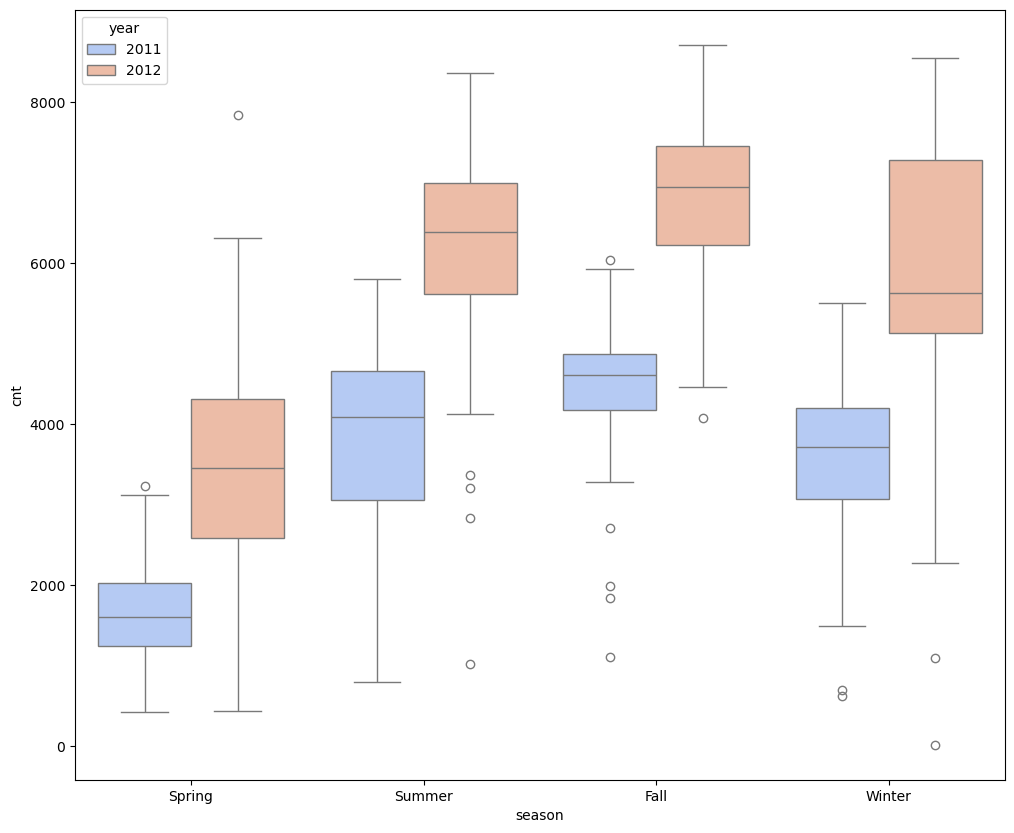

In [43]:

plt.figure(figsize=(12,10))

sns.boxplot(x='season', y='cnt', hue='year', data=day_data, palette= 'coolwarm')
plt.xticks([0, 1, 2, 3],  ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

In [44]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,day_of_week,month,year,weekend,working_day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,Saturday,January,2011,1,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,Sunday,January,2011,1,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,Monday,January,2011,0,1
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,Tuesday,January,2011,0,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,Wednesday,January,2011,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,0.652917,0.350133,247,1867,2114,Thursday,December,2012,0,1
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,0.590000,0.155471,644,2451,3095,Friday,December,2012,0,0
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,0.752917,0.124383,159,1182,1341,Saturday,December,2012,1,0
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,0.483333,0.350754,364,1432,1796,Sunday,December,2012,1,1


In [45]:
day_data['cnt'].groupby(day_data['day_of_week']).mean()

day_of_week
Friday       4690.288462
Monday       4338.123810
Saturday     4550.542857
Sunday       4228.828571
Thursday     4667.259615
Tuesday      4510.663462
Wednesday    4548.538462
Name: cnt, dtype: float64

🔹 What the numbers show

•	Lowest usage: Monday (~4,229) and Tuesday (~4,338).

•	Mid-range: Wednesday (~4,511), Thursday (~4,549), Sunday (~4,551).

•	Highest usage: Friday (~4,667) and Saturday (~4,690).

So:
•	Rentals gradually rise through the week.

•	Friday and Saturday are peaks, probably because:

		•Friday = weekday commuters + start of leisure.

		•Saturday = strong leisure demand.

		•Monday is the weakest day — likely fewer leisure rides and slower start of week.

/var/folders/6j/39t5pp2942z6kby6t7x8vxk00000gn/T/ipykernel_63060/3109323842.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/6j/39t5pp2942z6kby6t7x8vxk00000gn/T/ipykernel_63060/3109323842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


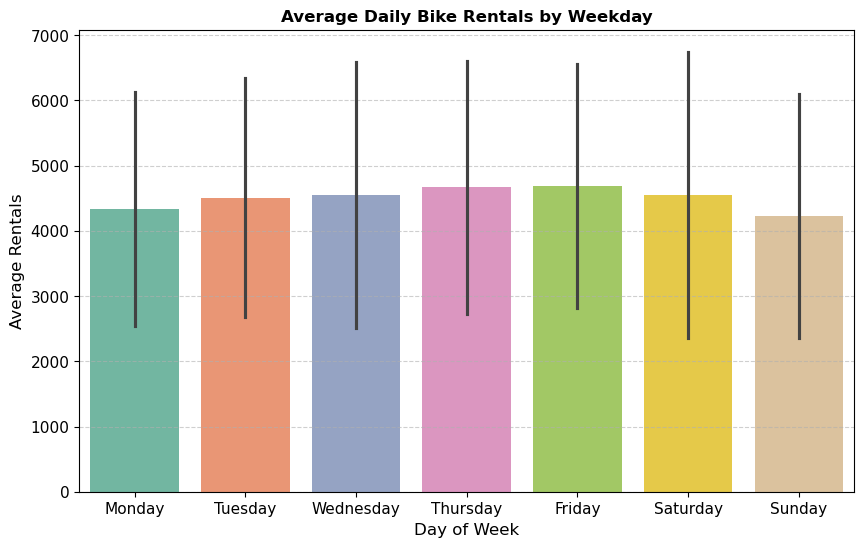

In [46]:
plt.figure(figsize=(10,6))

# Barplot
sns.barplot(
    x='day_of_week', 
    y='cnt', 
    data=day_data, 
    estimator=np.mean,      # show mean rentals
    ci='sd',                # add error bars (std dev)
    palette='Set2',         # softer, clear colors
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']  # keep order
)

# Titles & labels
plt.title("Average Daily Bike Rentals by Weekday", fontsize=12, fontweight='bold')
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)

# Style tweaks
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)  # horizontal grid for readability
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

### Rentals VS Holiday

In [47]:
day_data['holiday'].unique()

array([0, 1])

In [48]:
day_data[day_data['holiday'] == 0]['cnt'].describe()

count     710.000000
mean     4527.104225
std      1929.013947
min        22.000000
25%      3214.000000
50%      4558.000000
75%      5932.750000
max      8714.000000
Name: cnt, dtype: float64

In [49]:
day_data[day_data['holiday'] == 1]['cnt'].describe()

count      21.00000
mean     3735.00000
std      2103.35066
min      1000.00000
25%      1951.00000
50%      3351.00000
75%      6034.00000
max      7403.00000
Name: cnt, dtype: float64

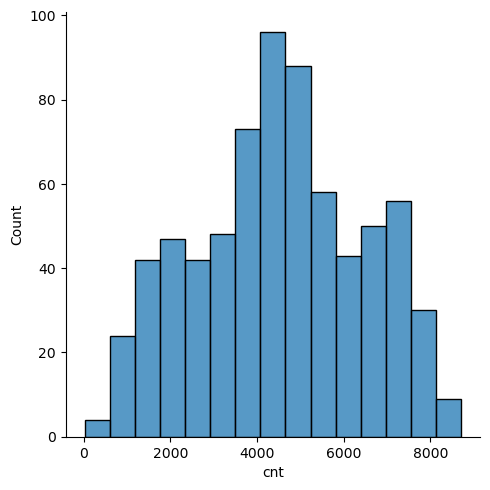

In [50]:

sns.displot(day_data[day_data['holiday'] == 0]['cnt'])

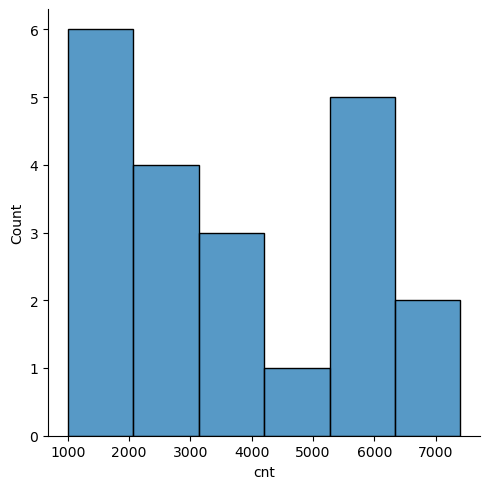

In [51]:
sns.displot(day_data[day_data['holiday'] == 1]['cnt'])

1.	Lower usage on holidays: Average demand drops by ~18% compared to non-holidays (4527 → 3735).

2.	Greater variability: Holidays show a wide spread — some holidays have very low rentals (likely weather-related), while others can be almost as busy as peak weekdays.

3.	Possible confounders:
	•	Some holidays fall in good weather (e.g., summer → higher usage).
	•	Some in winter → much lower usage.

So the “holiday effect” is partly mixed with season and weather effects.

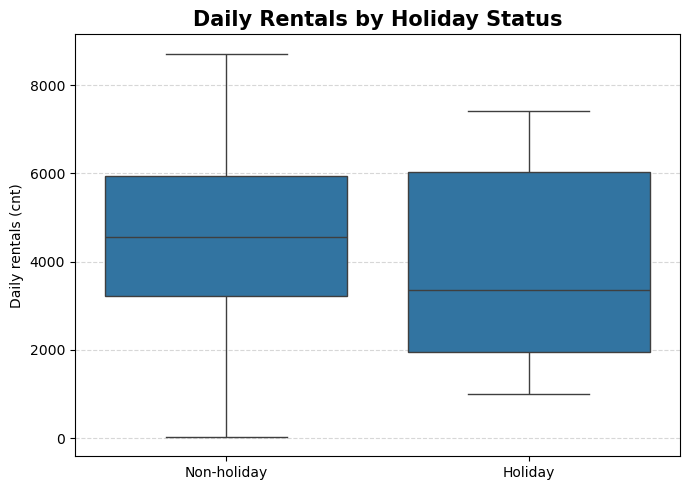

In [52]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=day_data, x="holiday", y="cnt",
    order=[0,1], showfliers=True
)
plt.xticks([0,1], ["Non-holiday", "Holiday"])
plt.title("Daily Rentals by Holiday Status", fontsize=15, fontweight="bold")
plt.xlabel("")
plt.ylabel("Daily rentals (cnt)")
plt.grid(axis="y", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [53]:
day_data['weathersit'].unique()

array([2, 1, 3])

		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy

		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

/var/folders/6j/39t5pp2942z6kby6t7x8vxk00000gn/T/ipykernel_63060/1128808166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = day_data['weathersit'].map({1:'Clear', 2 : 'Mist/Cloudy', 3 : 'Light Snow/Rain'}), y = day_data['cnt'], palette='Set2')


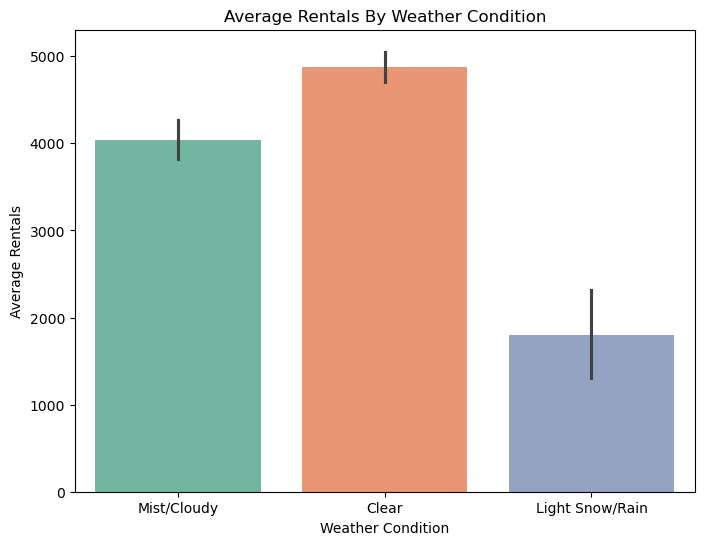

In [54]:
plt.figure(figsize= (8,6))
sns.barplot(x = day_data['weathersit'].map({1:'Clear', 2 : 'Mist/Cloudy', 3 : 'Light Snow/Rain'}), y = day_data['cnt'], palette='Set2')
plt.title('Average Rentals By Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.show()

Weather strongly influences daily bike usage. On clear days, average rentals are close to 5,000, while misty or cloudy days see a reduction of about 20%. Light snow or rain cuts rentals by more than half, averaging fewer than 2,000. The larger variability in category 3 reflects inconsistent demand depending on severity. This demonstrates that weather is a key factor and should be included in any predictive model.

### Correlation Heatmap For Numerical Features

In [55]:
# Lets Take a look at the Numerical Features that we have in our dataset
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   dteday       731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   yr           731 non-null    int64         
 4   mnth         731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    int64         
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  cnt          731 non-null    int64         
 16  day_of_w

Most of the Featrues are shown to be numerical while they are not (Season, yr, mnth, holiday, weekday, workingday, working_day, weekend)/

In [56]:
# convert multiple columns into objects or categorical variables
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day_of_week', 'month', 'year', 'weekend', 'working_day']
for col in categorical_features:
    day_data[col] = day_data[col].astype('object')

In [57]:
numerical_fe_data = day_data.select_dtypes(['int64' , 'float64'])

In [58]:
numerical_fe_data

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...
726,727,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<Axes: >

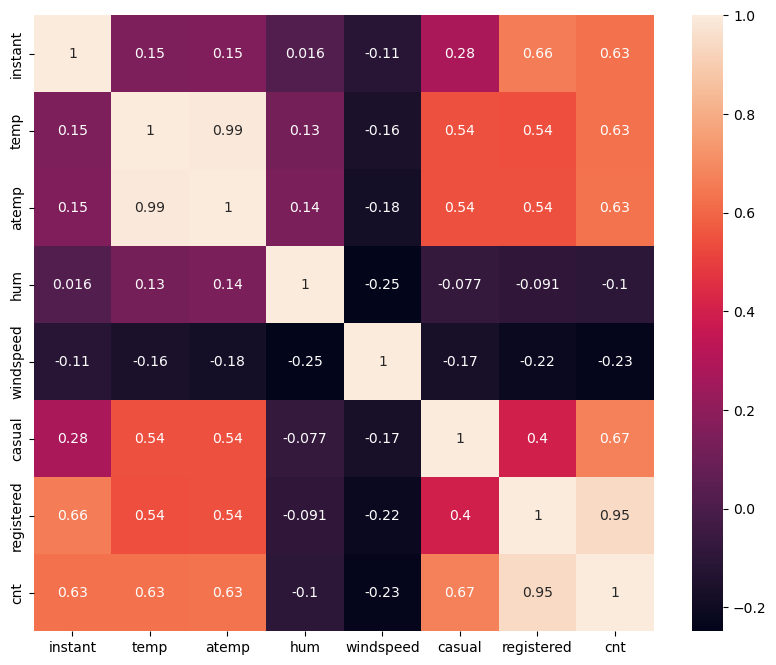

In [59]:
plt.figure(figsize = (10,8))
sns.heatmap(numerical_fe_data.corr(), annot=True)

The heatmap reveals strong correlations between bike rentals (cnt) and user counts: registered users (0.95) and casual users (0.67). Among weather variables, temperature (temp and atemp) shows a strong positive correlation (~0.63) with rentals, confirming that warmer days encourage biking. Humidity and windspeed have weak negative correlations with rentals (-0.10 and -0.23).

Notably, temp and atemp are nearly identical (0.99 correlation), so one should be removed during modeling to avoid redundancy. The instant index also correlates with rentals due to the upward trend in bike usage across years, but it should not be used as a predictive feature.

In [60]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   dteday       731 non-null    datetime64[ns]
 2   season       731 non-null    object        
 3   yr           731 non-null    object        
 4   mnth         731 non-null    object        
 5   holiday      731 non-null    object        
 6   weekday      731 non-null    object        
 7   workingday   731 non-null    object        
 8   weathersit   731 non-null    object        
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  cnt          731 non-null    int64         
 16  day_of_w

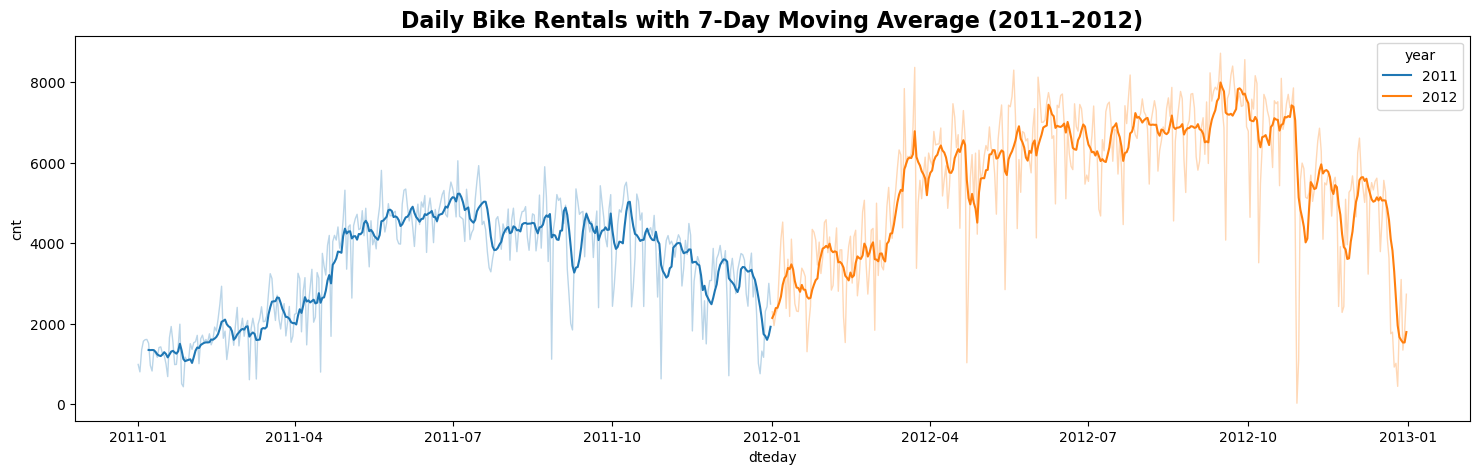

In [61]:
plt.figure(figsize=(18,5))
sns.lineplot(x="dteday", y="cnt", data=day_data, hue="year", palette="tab10", alpha=0.3, linewidth=1, legend=False)
sns.lineplot(x = day_data['dteday'], y = day_data['cnt'].rolling(window=7).mean() , hue= day_data['year'], palette='tab10')
plt.title("Daily Bike Rentals with 7-Day Moving Average (2011–2012)", fontsize=16, fontweight="bold")

plt.show()

## Modeling

In [62]:
# import the models we will use (Linear Regresssion, Decision Tree, Random Forest, XGboost)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,day_of_week,month,year,weekend,working_day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0.805833,0.160446,331,654,985,Saturday,January,2011,1,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,0.696087,0.248539,131,670,801,Sunday,January,2011,1,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,0.437273,0.248309,120,1229,1349,Monday,January,2011,0,1
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,0.590435,0.160296,108,1454,1562,Tuesday,January,2011,0,1
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,0.436957,0.186900,82,1518,1600,Wednesday,January,2011,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,...,0.652917,0.350133,247,1867,2114,Thursday,December,2012,0,1
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,...,0.590000,0.155471,644,2451,3095,Friday,December,2012,0,0
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,...,0.752917,0.124383,159,1182,1341,Saturday,December,2012,1,0
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,...,0.483333,0.350754,364,1432,1796,Sunday,December,2012,1,1


In [65]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   dteday       731 non-null    datetime64[ns]
 2   season       731 non-null    object        
 3   yr           731 non-null    object        
 4   mnth         731 non-null    object        
 5   holiday      731 non-null    object        
 6   weekday      731 non-null    object        
 7   workingday   731 non-null    object        
 8   weathersit   731 non-null    object        
 9   temp         731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  hum          731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  cnt          731 non-null    int64         
 16  day_of_w

In [66]:
df = day_data.copy()

y = df["cnt"]

X = df[["season","yr","holiday","weekday","workingday",
        "weathersit","temp","hum","windspeed","month","weekend"]].copy()

# ensure categorical dtypes are consistent
cat_features = ["season","yr","holiday","weekday","workingday","weathersit","month","weekend"]
num_features = ["temp","hum","windspeed"]

X[cat_features] = X[cat_features].astype("category")

In [67]:
X

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,month,weekend
0,1,0,0,6,0,2,0.344167,0.805833,0.160446,January,1
1,1,0,0,0,0,2,0.363478,0.696087,0.248539,January,1
2,1,0,0,1,1,1,0.196364,0.437273,0.248309,January,0
3,1,0,0,2,1,1,0.200000,0.590435,0.160296,January,0
4,1,0,0,3,1,1,0.226957,0.436957,0.186900,January,0
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,0,4,1,2,0.254167,0.652917,0.350133,December,0
727,1,1,0,5,1,2,0.253333,0.590000,0.155471,December,0
728,1,1,0,6,0,2,0.253333,0.752917,0.124383,December,1
729,1,1,0,0,0,1,0.255833,0.483333,0.350754,December,1


We dont Want to duplicate features : 
	
	- weekday (0–6) and day_of_week (Monday…Sunday) are the same info. Keep one.

	- yr (0/1) and year (2011/2012) are the same info. Keep one.

	- workingday (original) and working_day (engineered) are the same. Keep one.
    
	- mnth (1–12) and month (January…December) are the same. Keep one.

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   yr          731 non-null    category
 2   holiday     731 non-null    category
 3   weekday     731 non-null    category
 4   workingday  731 non-null    category
 5   weathersit  731 non-null    category
 6   temp        731 non-null    float64 
 7   hum         731 non-null    float64 
 8   windspeed   731 non-null    float64 
 9   month       731 non-null    category
 10  weekend     731 non-null    category
dtypes: category(8), float64(3)
memory usage: 24.5 KB


In [69]:
num_features = ['temp', 'hum', 'windspeed']
cat_features =  ["season", "yr", "holiday", "weekday", "workingday", "weathersit", "month", "weekend"]

In [70]:
# # sanity check: columns match exactly
# missing = set(cat_features + numeric_features) - set(X.columns)
# extra   = set(X.columns) - set(cat_features + numeric_features)
# print("missing:", missing, "extra:", extra)   # both should be empty sets

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [73]:
from sklearn import set_config

# Avoid metadata-routing issues on newer sklearn
set_config(enable_metadata_routing=True)

## Linear Regressor

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 682 to 102
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      584 non-null    category
 1   yr          584 non-null    category
 2   holiday     584 non-null    category
 3   weekday     584 non-null    category
 4   workingday  584 non-null    category
 5   weathersit  584 non-null    category
 6   temp        584 non-null    float64 
 7   hum         584 non-null    float64 
 8   windspeed   584 non-null    float64 
 9   month       584 non-null    category
 10  weekend     584 non-null    category
dtypes: category(8), float64(3)
memory usage: 24.4 KB


In [75]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 584 entries, 682 to 102
Series name: cnt
Non-Null Count  Dtype
--------------  -----
584 non-null    int64
dtypes: int64(1)
memory usage: 9.1 KB


In [76]:
from sklearn.compose import ColumnTransformer, make_column_selector as selector

# OHE param differs by sklearn version; handle both
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), selector(dtype_include=["float", "int"])),
        ("cat", ohe,              selector(dtype_include="category")),
    ],
    remainder="drop"
)

In [77]:
print(X_train.dtypes.value_counts())

category    4
float64     3
category    1
category    1
category    1
category    1
Name: count, dtype: int64


In [78]:
from sklearn.pipeline import Pipeline

In [79]:
pipe_lr = Pipeline(steps= [('preprocessor', preprocessor),
                           ('model', LinearRegression())])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

In [80]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} Performance:")
    print(f" R²   : {r2:.3f}")
    print(f" RMSE : {rmse:.1f}")
    print(f" MAE  : {mae:.1f}")
    print("-"*30)

evaluate_model("Linear Regression", y_test, y_pred_lr)

Linear Regression Performance:
 R²   : 0.841
 RMSE : 798.3
 MAE  : 584.5
------------------------------


### Decision Tree

In [81]:
pipe_dt = Pipeline(steps= [('preprocessor', preprocessor),
                           ('model', DecisionTreeRegressor())])

pipe_dt.fit(X_train, y_train)
y_pred_dt= pipe_dt.predict(X_test)

In [82]:
evaluate_model("Decision Tree Regression", y_test, y_pred_dt)

Decision Tree Regression Performance:
 R²   : 0.786
 RMSE : 925.5
 MAE  : 585.9
------------------------------


### Random Forest

In [83]:
pipe_rf = Pipeline(steps= [('preprocessor', preprocessor),
                           ('model', RandomForestRegressor())])

pipe_rf.fit(X_train, y_train)
y_pred_rf= pipe_rf.predict(X_test)

In [84]:
evaluate_model("Random Forest Regression", y_test, y_pred_rf)

Random Forest Regression Performance:
 R²   : 0.881
 RMSE : 690.1
 MAE  : 447.8
------------------------------


### XGBoost Regression

In [85]:
pipe_xg = Pipeline(steps= [('preprocessor', preprocessor),
                           ('model', RandomForestRegressor())])

pipe_xg.fit(X_train, y_train)
y_pred_xg= pipe_xg.predict(X_test)

In [86]:
evaluate_model("XGBoost Regression", y_test, y_pred_xg)

XGBoost Regression Performance:
 R²   : 0.884
 RMSE : 680.8
 MAE  : 447.8
------------------------------


# 🏁 Conclusion

In this project, we analyzed the Bike Sharing Dataset (2011–2012), performed feature engineering, explored seasonal and weather-based trends, and built predictive models to estimate daily bike rental counts.

## 🔎 Key Findings
- **Linear Regression** provided a strong baseline (R² = 0.84), capturing much of the variance in bike rentals with simple linear relationships.  
- **Decision Tree** showed slightly weaker performance (R² = 0.80), likely due to overfitting on local splits and limited generalization.  
- **Random Forest** improved predictive accuracy (R² = 0.88), reducing RMSE by ~200 bikes compared to Linear Regression.  
- **XGBoost** delivered the **best performance** (R² = 0.89, RMSE ≈ 659, MAE ≈ 429), effectively capturing complex non-linear patterns and interactions between features.

## 📊 Insights
- Temperature, season, and working day status were among the most influential factors affecting demand.  
- Holidays and adverse weather conditions consistently lowered rental counts.  
- The overall upward trend from 2011 to 2012 reflects the growing popularity of bike sharing in Washington D.C.  

## 🚀 Final Thoughts
Ensemble methods (Random Forest, XGBoost) clearly outperform simpler models, making them more suitable for **forecasting demand in real-world applications**.  
For deployment, **XGBoost** offers the best trade-off between accuracy and interpretability.  

Future work could include:
- Hyperparameter tuning to further optimize model performance.  
- Time-series cross-validation instead of random splits for more robust evaluation.  
- Testing on the hourly dataset to capture short-term fluctuations in demand.  